In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv("/content/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# check data types, number of columns and rows
df.info()
# checking the meaning of each column
# Pregnancies: Number of times pregnant
# Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance 
# test
# BloodPressure: Diastolic blood pressure (mm Hg)
# SkinThickness: Triceps skin fold thickness (mm)
# Insulin: 2-Hour serum insulin (mu U/ml)
# BMI: Body mass index (weight in kg/(height in m)^2)
# DiabetesPedigreeFunction: Diabetes pedigree function (provided some data on
# diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient.)
# Age: Age (years)
# Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# check null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# no null values, is that true??
# let's check the min and max value of each column
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Having zero values in the following columns does not make sense
# body mass index (BMI)
# SkinThickness
# Insulin
# Glucose
# BloodPressure
# replace zero with nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = \
  df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
# now, let's check null
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [8]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
# split the dataset before we appy the preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [9]:
train_df = pd.DataFrame(np.c_[X_train,y_train],columns=df.columns)
train_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0,0.0
1,0.0,146.0,82.0,NaN,NaN,40.5,1.781,44.0,0.0
2,5.0,109.0,62.0,41.0,129.0,35.8,0.514,25.0,1.0
3,4.0,110.0,66.0,NaN,NaN,31.9,0.471,29.0,0.0
4,11.0,127.0,106.0,NaN,NaN,39.0,0.190,51.0,0.0


In [10]:
test_df = pd.DataFrame(np.c_[X_test,y_test],columns=df.columns)
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47.0,1.0
1,3.0,187.0,70.0,22.0,200.0,36.4,0.408,36.0,1.0
2,7.0,106.0,92.0,18.0,NaN,22.7,0.235,48.0,0.0
3,0.0,135.0,68.0,42.0,250.0,42.3,0.365,24.0,1.0
4,4.0,84.0,90.0,23.0,56.0,39.5,0.159,25.0,0.0


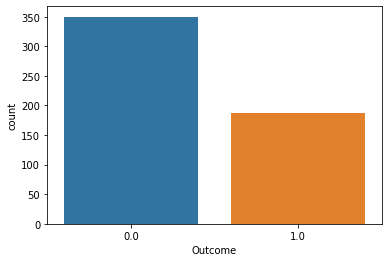

In [11]:
# check if the dataset is balanced 
sns.countplot(x="Outcome", data=train_df)

In [12]:
# check count of missing values in eac
df_outcome1 = train_df[train_df['Outcome'] == 1]
df_outcome1.isnull().sum()

Pregnancies                  0
Glucose                      2
BloodPressure               10
SkinThickness               63
Insulin                     99
BMI                          1
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [13]:
df_train_mod = train_df.drop(columns=['SkinThickness','Insulin'])
df_test_mod = test_df.drop(columns=['SkinThickness','Insulin'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3eda3c6ed0>,
      dtype=object)

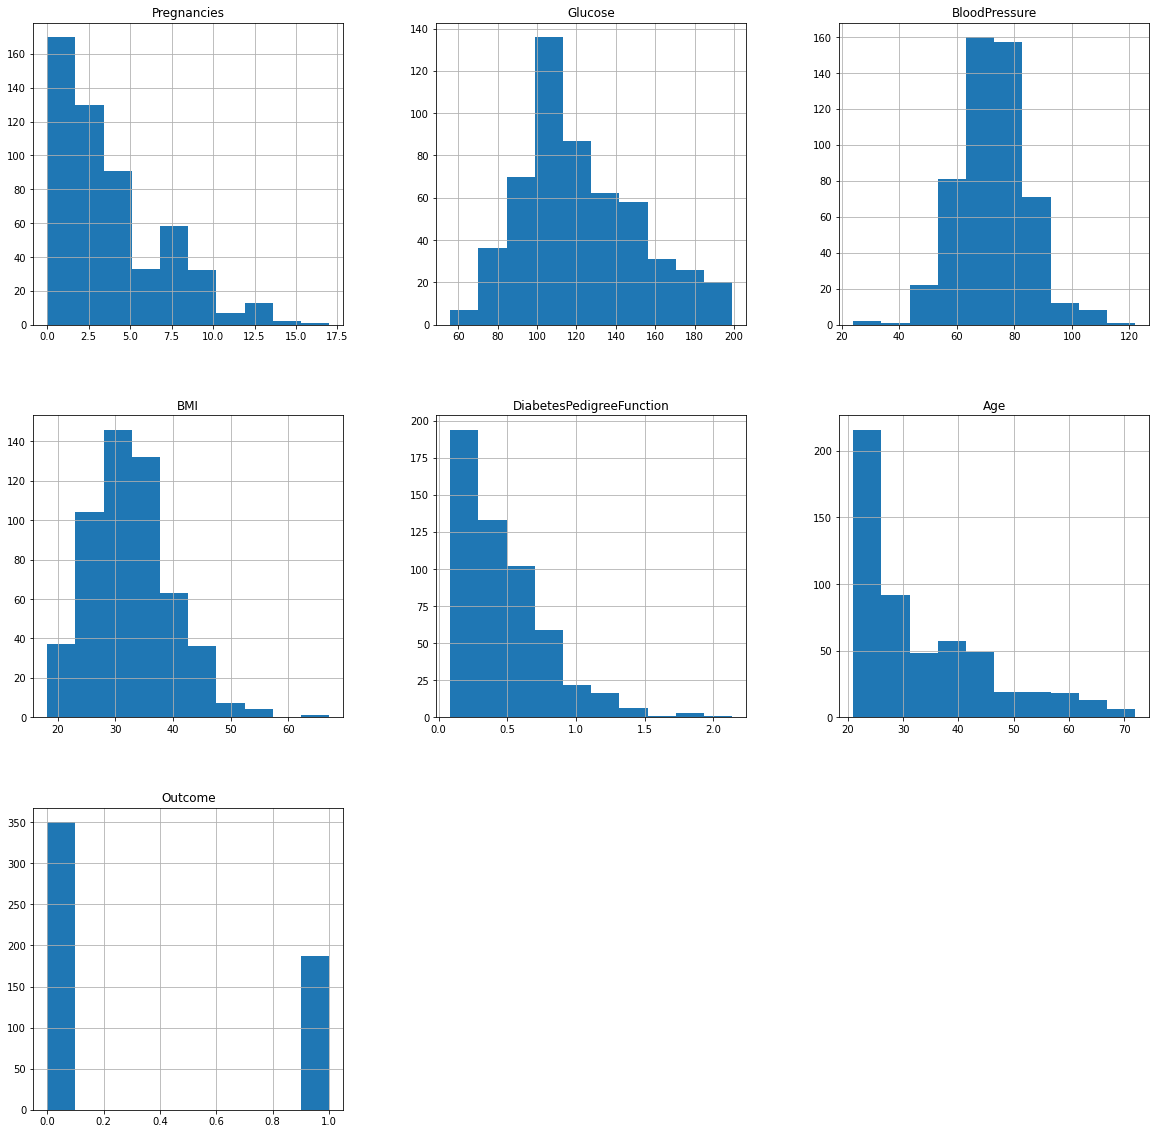

In [14]:
df_train_mod.hist(figsize = (20,20))

In [15]:
# BloodPressure looks close to normal distribution 
df_train_mod['BloodPressure'].fillna(df_train_mod['BloodPressure'].mean(), inplace = True)
df_train_mod['Glucose'].fillna(df_train_mod['Glucose'].median(), inplace = True)
df_train_mod['BMI'].fillna(df_train_mod['BMI'].median(), inplace = True)

# fill test data using the mean and median from training data to avoid any leakage
df_test_mod['BloodPressure'].fillna(df_train_mod['BloodPressure'].mean(), inplace = True)
df_test_mod['Glucose'].fillna(df_train_mod['Glucose'].median(), inplace = True)
df_test_mod['BMI'].fillna(df_train_mod['BMI'].median(), inplace = True)

In [16]:
df_train_mod.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df_test_mod.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

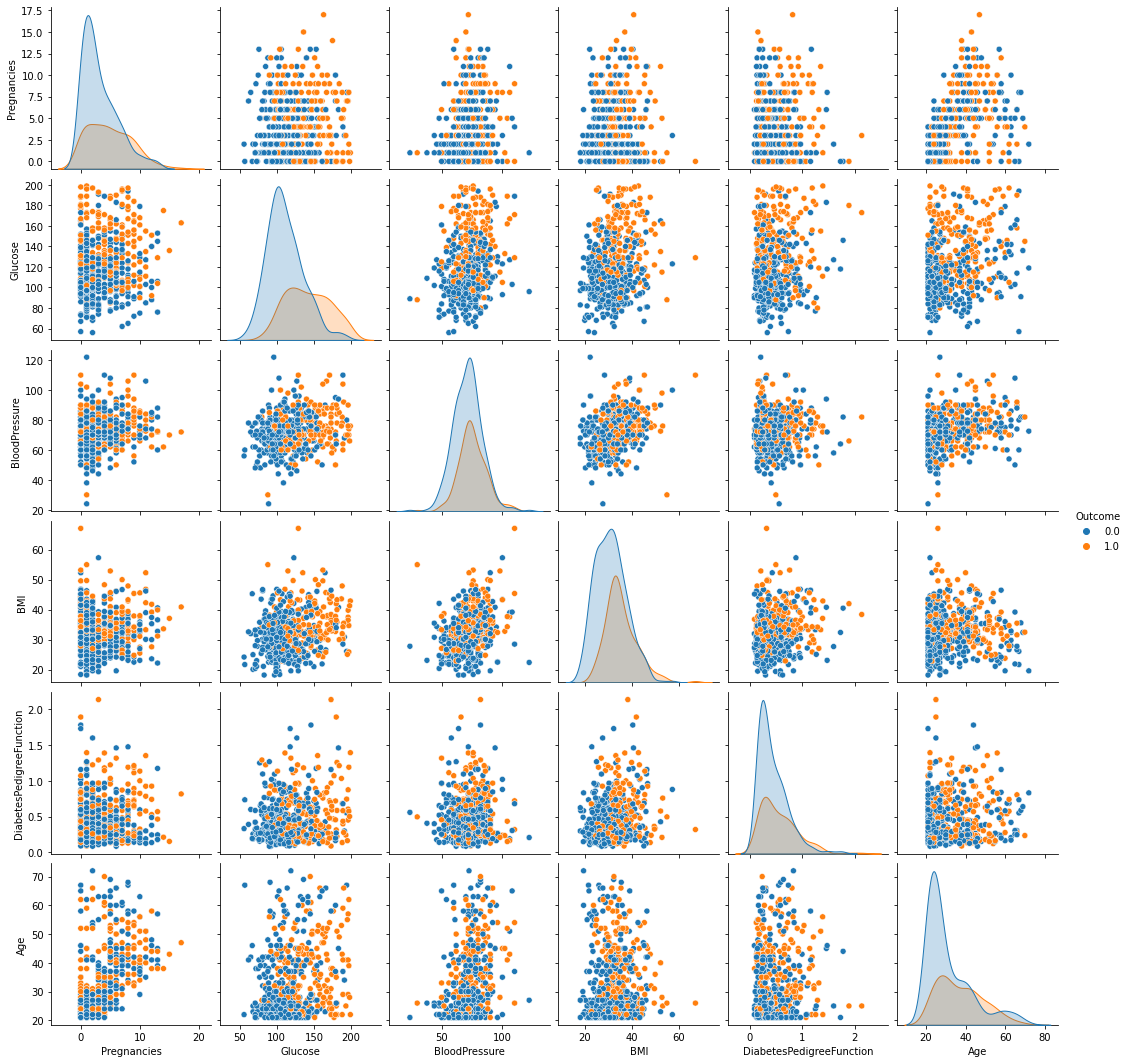

In [18]:
sns.pairplot(df_train_mod, hue='Outcome')

# Logistic Regression

In [19]:
X_train = df_train_mod.drop('Outcome',axis=1)
y_train = df_train_mod['Outcome']

X_test = df_test_mod.drop('Outcome',axis=1)
y_test = df_test_mod['Outcome'] 

model = LogisticRegression()
model.fit(X_train,y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.7690875232774674
0.7705627705627706


In [20]:
confusion_matrix(y_test, test_predictions)

array([[132,  18],
       [ 35,  46]])

In [21]:
print(classification_report(y_test, test_predictions))
# support: the number of actual occurrences of the class in the specified dataset (in this case test dataset)

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       150
         1.0       0.72      0.57      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



# Logistic Regression for Unbalanced Data

In [22]:
# define weights for each class to overcome the problem of unbalanced dataset
weights = {0:1.0, 1:2.0}
model = LogisticRegression(class_weight=weights)
model.fit(X_train,y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

print(accuracy_score(y_train, train_predictions))
print(accuracy_score(y_test, test_predictions))

0.7653631284916201
0.7619047619047619


In [23]:
confusion_matrix(y_test, test_predictions)

array([[115,  35],
       [ 20,  61]])

In [24]:
print(classification_report(y_test, test_predictions))
# support: the number of actual occurrences of the class in the specified dataset (in this case test dataset)

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       150
         1.0       0.64      0.75      0.69        81

    accuracy                           0.76       231
   macro avg       0.74      0.76      0.75       231
weighted avg       0.78      0.76      0.77       231



# KNN

In [25]:
# scale the data for KNN and SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:

# use grid search to select the best K
# Note KNN is not influced by the size of the class
knn_params = {'n_neighbors': list(range(1,100))}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_model.fit(X_train_scaled, y_train)
knn_train_pred = knn_model.predict(X_train_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)
knn_model.best_params_

{'n_neighbors': 23}

In [27]:
print(accuracy_score(y_train, knn_train_pred))
print(accuracy_score(y_test, knn_test_pred))

0.776536312849162
0.7619047619047619


In [28]:
print(classification_report(y_test, knn_test_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.87      0.83       150
         1.0       0.70      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



# SVM

In [29]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10], 'degree':[2,5]}
svc = svm.SVC(class_weight={0:1.0, 1:2.0})
svm_model = GridSearchCV(svc, parameters)
svm_model.fit(X_train_scaled, y_train)
svm_train_pred = svm_model.predict(X_train_scaled)
svm_test_pred = svm_model.predict(X_test_scaled)
svm_model.best_params_

{'C': 1, 'degree': 2, 'kernel': 'rbf'}

In [30]:
print(accuracy_score(y_train, svm_train_pred))
print(accuracy_score(y_test, svm_test_pred))

0.8100558659217877
0.7835497835497836


In [31]:
print(classification_report(y_test, svm_test_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82       150
         1.0       0.65      0.81      0.73        81

    accuracy                           0.78       231
   macro avg       0.77      0.79      0.77       231
weighted avg       0.80      0.78      0.79       231



In [32]:
print(classification_report(y_train, svm_train_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       350
         1.0       0.68      0.86      0.76       187

    accuracy                           0.81       537
   macro avg       0.80      0.82      0.80       537
weighted avg       0.83      0.81      0.81       537

